##### Imports

In [1]:
import pandas as pd
import csv
import logging
from tracker_funcs import read_jem, read_ephys, read_shiny, \
sort_df, create_cond_df, create_region_col, merge_dfs

import seaborn as sns
import matplotlib.pyplot as plt

##### Logging Set-up

In [2]:
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

##### Miscellaneous Settings

In [3]:
sns.set(context = "notebook", style = "ticks", font="verdana", font_scale = 1.35)
pd.set_option("display.max_colwidth",150) #Expands the number of characters shown in the columns
pd.set_option('display.max_columns', None)

##### Logging Comments about this project

In [4]:
logger.info("""Purpose: Discovering similarities/differences in ephys features among new mouse regions""")

INFO:__main__:Purpose: Discovering similarities/differences in ephys features among new mouse regions


##### Main

In [5]:
if __name__ == "__main__":
    jem = read_jem()
    logger.info("Imported jem_metadata.csv as a dataframe")
    
    r_users = ["kristenh", "lindsayn", "ramr", "katherineb", "jessicat"] 
    jem_2020 = sort_df(jem, r_users)
    logger.info("Sorted jem by date range: 1/03/2020 - present")
    
    jem_2020["p_container"] = jem_2020.container.str[0:4]
    logger.info("Creating column to check p_container")
    jem_2020.p_container.unique()
    
    jem_2020 = jem_2020.reset_index()
    start_date = jem_2020["date"].iloc[0][0:10]
    end_date = jem_2020["date"].iloc[-1][0:10]
    jem_2020 = jem_2020.set_index(["date"])
    
    mjem_2020 = create_cond_df(jem_2020, "organism_name", "Mouse")
    mjem_2020 = create_region_col(mjem_2020)
    cor = create_cond_df(mjem_2020, "new_region", "coronal_region")
    sag = create_cond_df(mjem_2020, "new_region", "sagittal_region")
    other = create_cond_df(mjem_2020, "new_region", "other_region")
    v1 = create_cond_df(mjem_2020, "new_region", "v1_region")
    logger.info("Created region pandas dataframes")

INFO:tracker_funcs:Read jem metadata csv as a pandas dataframe
INFO:__main__:Imported jem_metadata.csv as a dataframe
INFO:tracker_funcs:Dropped NaNs from index date, rigOperator and container column
INFO:tracker_funcs:Created dataframe with selected users in container column
INFO:__main__:Sorted jem by date range: 1/03/2020 - present
INFO:__main__:Creating column to check p_container
INFO:tracker_funcs:Created a conditional dataframe
C:\Users\ramr\Documents\Github\analysis_projects\analysis_scripts\tracker_funcs.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["new_region"] = "default_value"
INFO:tracker_funcs:Created a new column(new_region) with default_value
C:\Users\ramr\Documents\Github\analysis_projects\analysis_scripts\tracker_funcs

##### Creating Time columns for exp_time, rec_time, ext_time, ret_time 

In [6]:
#jem["exp_time"] = pd.to_datetime(jem["extraction.timeRetractionEnd"]) - pd.to_datetime(jem["recording.timeStart"])
#jem["rec_time"] = pd.to_datetime(jem["extraction.timeRetractionEnd"]) - pd.to_datetime(jem["recording.timeWholeCellStart"])
#jem["ext_time"] = pd.to_datetime(jem["extraction.timeExtractionEnd"]) - pd.to_datetime(jem["extraction.timeExtractionStart"])
#jem["ret_time"] = pd.to_datetime(jem["extraction.timeRetractionEnd"]) - pd.to_datetime(jem["extraction.timeExtractionEnd"])

##### Creating post_patch_outcomes based on end seal and post Patch

In [7]:
jem_2020.rigOperator.value_counts()

lindsayn      141
katherineb    126
ramr           96
jessicat       72
kristenh       39
Name: rigOperator, dtype: int64

##### EPhys

In [8]:
ephys = read_ephys()

INFO:tracker_funcs:Read mouse ephys features csv as a pandas dataframe


In [9]:
shiny = read_shiny()

C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (135) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
INFO:tracker_funcs:Read shiny link as a pandas dataframe


In [10]:
shiny

,Unnamed: 0,sample_id,cluster_detail,cluster_label,score,n_marker,res_index,h_score,marker_genes,res_index_pctile,exp_component_name,ar_id,exp_component_vendor_name,batch,batch_vendor_name,tube,tube_internal_name,tube_contents_nm,tube_contents_nm_from_vendor,tube_avg_size_bp,tube_input_fmol,r1_index,r2_index,index_sequence_pair,organism,facs_container,sample_name,patched_cell_container,cell_name,cell_id,sample_quantity_count,sample_quantity_pg,external_donor_name,gender,control,cell_prep_type,full_genotype,facs_population_plan,cre_line,reporter,injection_roi,injection_method,injection_materials,propagation_type,roi,patchseq_roi,medical_conditions,slice_min_pos,slice_max_pos,rna_amplification_set,rna_amplification,amp_date,pcr_cycles,percent_cdna_longer_than_400bp,rna_amplification_pass_fail,amplified_quantity_ng,library_prep_set,library_prep,lib_date,library_input_ng,avg_size_bp,quantification2_ng,quantification_fmol,quantification2_nm,library_prep_pass_fail,exp_cluster_density_thousands_per_mm2,lane_read_count,alignment_date,vendor_read_count,total_reads,percent_reads_aligned_to_exons,percent_reads_aligned_to_rrna,percent_reads_aligned_to_trna,percent_reads_aligned_to_rrna_rmsk,percent_reads_aligned_to_trna_rmsk,percent_reads_aligned_to_ncrna,percent_reads_aligned_to_mt_exons,percent_reads_aligned_to_introns,percent_reads_aligned_to_intergenic,percent_reads_aligned_unique,percent_reads_aligned_to_ecoli,percent_reads_aligned_to_synthetic_constructs,percent_reads_aligned_total,complexity_aatt,complexity_acgt,complexity_agct,complexity_at,complexity_catg,complexity_ccgg,complexity_cg,complexity_gatc,complexity_gc,complexity_ta,experiment_component_failed,fpkm_published,fpkm_dir,fpkm_filename,transcriptome_bam_filename,fastq_path_list,S4.Lot,Data,MultiPlex,Genes.With.FPKM,Genes.Detected,FPKM.4,FPKM.8,FPKM.16,FPKM.32,FPKM.64,Genes.With.CPM,Genes.Detected.CPM,CPM.4,CPM.8,CPM.16,CPM.32,CPM.64,Exclude.STAR,Region,Well.Row,Well.Column,Type,tubeID,patch.date,rigOperator,rigNumber,Fill.Date,internalFillDate,pilotName,creCell,autoRoi,manualRoi,cell_depth,sliceHealth,timeWholeCellStart,timeExtractionStart,pressureApplied,timeExtractionEnd,retractionPressureApplied,timeRetractionEnd,postPatch,endPipetteR,Total_time,Ephys_time,Retraction_time,Virus,cell_specimen_project,structure,go_no_go_63x,image_series_63x_qc,Class,last_map,last_score,last_res,cluster_same,topLeaf,topLeafValue,broad_class_label,subclass_label,topLeaf_label,quality_score_label,marker_sum_norm_label,Norm_Marker_Sum.0.4_label,contaminationType_label,seurat_cluster_label,seurat_prediction_score_label,Tree_first_cl,Tree_second_cl,Tree_third_cl,Tree_first_bt,Tree_second_bt,Tree_third_bt,Tree_first_KL,Tree_second_KL,Tree_third_KL,Tree_first_cor,Tree_second_cor,Tree_third_cor,Tree_call,Old_call
0,1,P1S4_170807_003_A01,L2/3 IT VISp Rrad,L2/3 IT VISp Rrad,1.0,8,1.0,1.0,"L2/3 IT VISp Rrad:Baz1a Fosb Fosl2 Csrnp1 Rrad Pim1 Met Nos1,n39:Calb1 Meis2 Pdzrn3 Dscaml1 Cux2 Fam19a1 Gpc6 Nov Rgs8 Npnt Igsf11 Kitl Ccbe1 Pcdh...",100,PS0830_E1-50_S91,687624861,NaN,P3S4-170830,BT038,PS0830,BT170830_01,5.000000,NaN,350.0,5,N729,S505,TCGACGTC-GTAAGGAG,Mouse,NaN,NaN,P1S4_170807_003_A01,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-338915.05.02.03,606790451,1,NaN,338915,M,NaN,NaN,Vipr2-IRES2-Cre/wt;Slc32a1-T2A-FlpO/wt;Ai65(RCFL-tdT)/wt,NaN,Slc32a1-T2A-FlpO_and_Vipr2,Ai65(RCFL-tdT),NaN,NaN,NaN,NaN,NaN,VISp,NaN,3.0,6.0,A3S4_170810b,A3S4_170810_016,NaN,21x,0.669407,Pass,35.670000,L3S4_170824,L3S4_170824_043,8/24/2017 7:00,0.15,378.0,NaN,42.568543,NaN,Pass,NaN,NaN,25:23.1,NaN,1981074,63.790063,0.088538,0.040584,0.268087,0.014739,2.894995,0.0,31.720522,4.489415,53.815759,0.000725,0.006814,59.538008,1.002786,0.909747,1.199936,0.867220,1.252630,1.106709,0.348370,1.067803,0.935120,0.676909,False,NaN,/allen/programs/celltypes/production/mousecelltypes/prod217/Star_Analysis_Run_687624861/687624861/,ar_687624861_STAR_ReadsPerGene.out.tab,ar_618245608.aligned_transcriptome.sorted.bam,/allen/programs/celltypes/product

In [11]:
shiny.to_csv("shiny.csv")

##### Merge jem_2020 with ephys_features

In [12]:
m_df = merge_dfs(mjem_2020, ephys)

In [13]:
m_df

,organism_name,name,extraction.endPipetteR,extraction.postPatch,rigOperator,status,roi_major,roi_minor,container,p_container,new_region,b'vrest',b'sag',b'tau',b'upstroke_downstroke_ratio_long_square',b'latency',b'f_i_curve_slope'
date,,,,,,,,,,,,,,,,,
2020-01-03 10:40:30 -0800,Mouse,Gad2-IRES-Cre;Ai14-504539.10.01.01,1000.0,nucleus_present,jessicat,SUCCESS,RSPd,layer 2/3,PFS4_200103_701_A01,PFS4,coronal_region,-65.282120,0.148347,13.020941,3.711103,0.03164,0.149533
2020-01-03 13:00:07 -0800,Mouse,Pvalb-IRES-Cre;Ai14-504851.11.01.02,2000.0,nucleus_present,jessicat,SUCCESS,RSPv,layer 2/3,PFS4_200103_703_A01,PFS4,coronal_region,-66.313396,0.269889,10.218081,2.976385,0.04538,0.060000
2020-01-03 13:00:07 -0800,Mouse,Pvalb-IRES-Cre;Ai14-504851.11.01.01,1000.0,nucleus_present,jessicat,SUCCESS,RSPd,layer 5,PFS4_200103_702_A01,PFS4,coronal_region,-88.126678,0.159878,9.964491,2.951999,0.04614,0.024934
2020-01-06 13:12:44 -0800,Mouse,Vip-IRES-Cre;Ai14-504179.11.01.02,3000.0,nucleus_present,jessicat,SUCCESS,SSp,layer 5,PFS4_200106_702_A01,PFS4,coronal_region,-68.603827,0.159457,15.867854,2.760209,0.05240,0.089362
2020-01-06 13:12:44 -0800,Mouse,Vip-IRES-Cre;Ai14-504179.11.01.01,7.0,nucleus_present,jessicat,SUCCESS,RSPd,layer 5,PFS4_200106_701_A01,PFS4,coronal_region,-70.997942,0.053066,5.103991,1.318873,0.06372,0.060714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-11 13:21:55 -0800,Mouse,Slc32a1-IRES-Cre;Sncg-IRES2-FlpO;Ai65-509370.02.02.01,2.8,nucleus_absent,ramr,SUCCESS,HIP,CA1,PAS4_200211_453_A01,PAS4,other_region,-57.355919,0.068102,25.826469,3.398346,0.02018,0.265934
2020-02-11 13:46:18 -0800,Mouse,Slc32a1-IRES-Cre;Sncg-IRES2-FlpO;Ai65-509370.03.01.02,4500.0,nucleus_present,kristenh,SUCCESS,HIP,CA1,P1S4_200211_004_A01,P1S4,other_region,-60.810135,0.137016,45.708552,2.101639,0.02634,0.325476
2020-02-11 13:50:40 -0800,Mouse,Slc32a1-IRES-Cre;Sncg-IRES2-FlpO;Ai65-509370.03.02.01,2000.0,nucleus_present,lindsayn,SUCCESS,HIP,CA1,P8S4_200211_353_A01,P8S4,other_region,-75.967859,0.265232,22.152301,2.292661,0.02000,0.542308


In [14]:
m_df.reset_index(inplace=True)
all_df = pd.merge(left = m_df,
               right = shiny,
               left_on = "container",
               right_on = "sample_id",
               how = "inner")
all_df.drop(columns=["sample_id"], inplace=True)
#all_df.dropna(subset=["b'vrest'", "b'sag'", "b'tau'", 
#                   "b'upstroke_downstroke_ratio_long_square'",
#                   "b'latency'", "b'f_i_curve_slope'"], inplace=True) #22 NAns
all_df.set_index(["date"], inplace=True)

In [15]:
all_df.head()

,organism_name,name,extraction.endPipetteR,extraction.postPatch,rigOperator_x,status,roi_major,roi_minor,container,p_container,new_region,b'vrest',b'sag',b'tau',b'upstroke_downstroke_ratio_long_square',b'latency',b'f_i_curve_slope',Unnamed: 0,cluster_detail,cluster_label,score,n_marker,res_index,h_score,marker_genes,res_index_pctile,exp_component_name,ar_id,exp_component_vendor_name,batch,batch_vendor_name,tube,tube_internal_name,tube_contents_nm,tube_contents_nm_from_vendor,tube_avg_size_bp,tube_input_fmol,r1_index,r2_index,index_sequence_pair,organism,facs_container,sample_name,patched_cell_container,cell_name,cell_id,sample_quantity_count,sample_quantity_pg,external_donor_name,gender,control,cell_prep_type,full_genotype,facs_population_plan,cre_line,reporter,injection_roi,injection_method,injection_materials,propagation_type,roi,patchseq_roi,medical_conditions,slice_min_pos,slice_max_pos,rna_amplification_set,rna_amplification,amp_date,pcr_cycles,percent_cdna_longer_than_400bp,rna_amplification_pass_fail,amplified_quantity_ng,library_prep_set,library_prep,lib_date,library_input_ng,avg_size_bp,quantification2_ng,quantification_fmol,quantification2_nm,library_prep_pass_fail,exp_cluster_density_thousands_per_mm2,lane_read_count,alignment_date,vendor_read_count,total_reads,percent_reads_aligned_to_exons,percent_reads_aligned_to_rrna,percent_reads_aligned_to_trna,percent_reads_aligned_to_rrna_rmsk,percent_reads_aligned_to_trna_rmsk,percent_reads_aligned_to_ncrna,percent_reads_aligned_to_mt_exons,percent_reads_aligned_to_introns,percent_reads_aligned_to_intergenic,percent_reads_aligned_unique,percent_reads_aligned_to_ecoli,percent_reads_aligned_to_synthetic_constructs,percent_reads_aligned_total,complexity_aatt,complexity_acgt,complexity_agct,complexity_at,complexity_catg,complexity_ccgg,complexity_cg,complexity_gatc,complexity_gc,complexity_ta,experiment_component_failed,fpkm_published,fpkm_dir,fpkm_filename,transcriptome_bam_filename,fastq_path_list,S4.Lot,Data,MultiPlex,Genes.With.FPKM,Genes.Detected,FPKM.4,FPKM.8,FPKM.16,FPKM.32,FPKM.64,Genes.With.CPM,Genes.Detected.CPM,CPM.4,CPM.8,CPM.16,CPM.32,CPM.64,Exclude.STAR,Region,Well.Row,Well.Column,Type,tubeID,patch.date,rigOperator_y,rigNumber,Fill.Date,internalFillDate,pilotName,creCell,autoRoi,manualRoi,cell_depth,sliceHealth,timeWholeCellStart,timeExtractionStart,pressureApplied,timeExtractionEnd,retractionPressureApplied,timeRetractionEnd,postPatch,endPipetteR,Total_time,Ephys_time,Retraction_time,Virus,cell_specimen_project,structure,go_no_go_63x,image_series_63x_qc,Class,last_map,last_score,last_res,cluster_same,topLeaf,topLeafValue,broad_class_label,subclass_label,topLeaf_label,quality_score_label,marker_sum_norm_label,Norm_Marker_Sum.0.4_label,contaminationType_label,seurat_cluster_label,seurat_prediction_score_label,Tree_first_cl,Tree_second_cl,Tree_third_cl,Tree_first_bt,Tree_second_bt,Tree_third_bt,Tree_first_KL,Tree_second_KL,Tree_third_KL,Tree_first_cor,Tree_second_cor,Tree_third_cor,Tree_call,Old_call
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-03 10:40:30 -0800,Mouse,Gad2-IRES-Cre;Ai14-504539.10.01.01,1000.0,nucleus_present,jessicat,SUCCESS,RSPd,layer 2/3,PFS4_200103_701_A01,PFS4,coronal_region,-65.282120,0.148347,13.020941,3.711103,0.03164,0.149533,122,L2/3 IT VISp Agmat,L2/3 IT VISp Agmat,0.91,10,1.000000,0.910000,"L2/3 IT VISp Agmat:Igfn1 Agmat Penk Adcyap1 Nell1 Clec18a Cbln4 Gpr83 Lynx1 Cthrc1,n40:Sorcs1 Wnt10a Lynx1 Paqr7 Serpinb8 Abracl Igfn1 Nell1 Mei1 ...",100,SM-J39ST_S681_E1-50,1006521581,SM-J39ST-S681,R8S4-200205,RSC-245,SM-J39ST,R8S4-20020501,4.448299,3.34,372.0,10,IDT_10nt_NXT_i7_386,IDT_10nt_NXT_i5_386,TAGCTTCGTA-ACCTCAACGT,Mouse,NaN,NaN,PFS4_200103_701_A01,Gad2-IRES-Cre;Ai14-504539.10.01.01,997541435,1,NaN,504539,M,NaN,NaN,Gad2-IRES-Cre/wt;Ai14(RCL-tdT)/wt,NaN,Gad2,Ai14(RCL-tdT),NaN,NaN,Na

In [16]:
all_df.tail()

,organism_name,name,extraction.endPipetteR,extraction.postPatch,rigOperator_x,status,roi_major,roi_minor,container,p_container,new_region,b'vrest',b'sag',b'tau',b'upstroke_downstroke_ratio_long_square',b'latency',b'f_i_curve_slope',Unnamed: 0,cluster_detail,cluster_label,score,n_marker,res_index,h_score,marker_genes,res_index_pctile,exp_component_name,ar_id,exp_component_vendor_name,batch,batch_vendor_name,tube,tube_internal_name,tube_contents_nm,tube_contents_nm_from_vendor,tube_avg_size_bp,tube_input_fmol,r1_index,r2_index,index_sequence_pair,organism,facs_container,sample_name,patched_cell_container,cell_name,cell_id,sample_quantity_count,sample_quantity_pg,external_donor_name,gender,control,cell_prep_type,full_genotype,facs_population_plan,cre_line,reporter,injection_roi,injection_method,injection_materials,propagation_type,roi,patchseq_roi,medical_conditions,slice_min_pos,slice_max_pos,rna_amplification_set,rna_amplification,amp_date,pcr_cycles,percent_cdna_longer_than_400bp,rna_amplification_pass_fail,amplified_quantity_ng,library_prep_set,library_prep,lib_date,library_input_ng,avg_size_bp,quantification2_ng,quantification_fmol,quantification2_nm,library_prep_pass_fail,exp_cluster_density_thousands_per_mm2,lane_read_count,alignment_date,vendor_read_count,total_reads,percent_reads_aligned_to_exons,percent_reads_aligned_to_rrna,percent_reads_aligned_to_trna,percent_reads_aligned_to_rrna_rmsk,percent_reads_aligned_to_trna_rmsk,percent_reads_aligned_to_ncrna,percent_reads_aligned_to_mt_exons,percent_reads_aligned_to_introns,percent_reads_aligned_to_intergenic,percent_reads_aligned_unique,percent_reads_aligned_to_ecoli,percent_reads_aligned_to_synthetic_constructs,percent_reads_aligned_total,complexity_aatt,complexity_acgt,complexity_agct,complexity_at,complexity_catg,complexity_ccgg,complexity_cg,complexity_gatc,complexity_gc,complexity_ta,experiment_component_failed,fpkm_published,fpkm_dir,fpkm_filename,transcriptome_bam_filename,fastq_path_list,S4.Lot,Data,MultiPlex,Genes.With.FPKM,Genes.Detected,FPKM.4,FPKM.8,FPKM.16,FPKM.32,FPKM.64,Genes.With.CPM,Genes.Detected.CPM,CPM.4,CPM.8,CPM.16,CPM.32,CPM.64,Exclude.STAR,Region,Well.Row,Well.Column,Type,tubeID,patch.date,rigOperator_y,rigNumber,Fill.Date,internalFillDate,pilotName,creCell,autoRoi,manualRoi,cell_depth,sliceHealth,timeWholeCellStart,timeExtractionStart,pressureApplied,timeExtractionEnd,retractionPressureApplied,timeRetractionEnd,postPatch,endPipetteR,Total_time,Ephys_time,Retraction_time,Virus,cell_specimen_project,structure,go_no_go_63x,image_series_63x_qc,Class,last_map,last_score,last_res,cluster_same,topLeaf,topLeafValue,broad_class_label,subclass_label,topLeaf_label,quality_score_label,marker_sum_norm_label,Norm_Marker_Sum.0.4_label,contaminationType_label,seurat_cluster_label,seurat_prediction_score_label,Tree_first_cl,Tree_second_cl,Tree_third_cl,Tree_first_bt,Tree_second_bt,Tree_third_bt,Tree_first_KL,Tree_second_KL,Tree_third_KL,Tree_first_cor,Tree_second_cor,Tree_third_cor,Tree_call,Old_call
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-13 13:04:25 -0800,Mouse,Esr2-IRES2-Cre;Ai14-506383.04.02.03,2000.0,nucleus_present,lindsayn,SUCCESS,RSPd,layer 5,P8S4_200113_356_A01,P8S4,coronal_region,-80.194367,0.064300,12.810372,4.415006,0.05912,0.157009,5165,n_L2/3_IT,n40,0.86,12,0.887123,0.762926,"n40:Sorcs1 Zfp811 Rhebl1 Abracl Igfn1 Nell1 Olfm3 Tuba8 Wisp1 Sptbn5 Slc23a3 Kazald1,n39:Calb1 Meis2 Pdzrn3 Dscaml1 Cux2 Stxbp6 Fam19a1 Gpc6 Nov G...",50,SM-J39ST_S760_E1-50,1006521665,SM-J39ST-S760,R8S4-200205,RSC-245,SM-J39ST,R8S4-20020501,4.448299,3.34,372.0,10,IDT_10nt_NXT_i7_479,IDT_10nt_NXT_i5_479,TTCAAGGAGA-CGAATGATCG,Mouse,NaN,NaN,P8S4_200113_356_A01,Esr2-IRES2-Cre;Ai14-506383.04.02.03,999853927,1,NaN,506383,M,NaN,NaN,Esr2-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,NaN,Esr2,Ai14(RCL-tdT),NaN,NaN,NaN,NaN,RSPd5,RSPd5,NaN,4

In [17]:
all_df["roi_major"].unique()

array(['RSPd', 'RSPv', 'SSp', 'MOs', 'MOp', 'ORB', 'CTXsp'], dtype=object)

In [18]:
rspd = create_cond_df(all_df, "roi_major", "RSPd")
rspv = create_cond_df(all_df, "roi_major", "RSPv")
ssp = create_cond_df(all_df, "roi_major", "SSp")
orb = create_cond_df(all_df, "roi_major", "ORB")
ctxsp = create_cond_df(all_df, "roi_major", "CTXsp")
mos = create_cond_df(all_df, "roi_major", "MOs")
mop = create_cond_df(all_df, "roi_major", "MOp")

INFO:tracker_funcs:Created a conditional dataframe
INFO:tracker_funcs:Created a conditional dataframe
INFO:tracker_funcs:Created a conditional dataframe
INFO:tracker_funcs:Created a conditional dataframe
INFO:tracker_funcs:Created a conditional dataframe
INFO:tracker_funcs:Created a conditional dataframe
INFO:tracker_funcs:Created a conditional dataframe


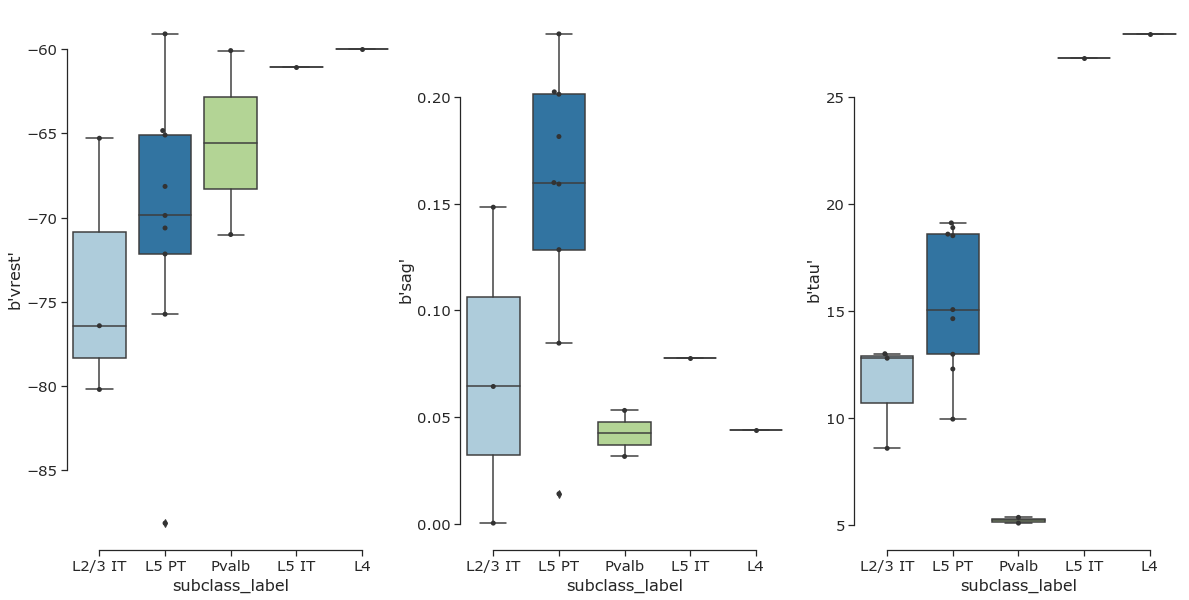

In [19]:
fig_dims = (20, 10)
f, axes = plt.subplots(1, 3, figsize=fig_dims)

sns.boxplot(x="subclass_label",
              y="b'vrest'",
              data=rspd, palette="Paired", ax=axes[0])
sns.swarmplot(x="subclass_label",
              y="b'vrest'",
              data=rspd, color="0.2", ax=axes[0])

sns.boxplot(x="subclass_label",
              y="b'sag'",
              data=rspd, palette="Paired", ax=axes[1])
sns.swarmplot(x="subclass_label",
              y="b'sag'",
              data=rspd, color="0.2", ax=axes[1])

sns.boxplot(x="subclass_label",
              y="b'tau'",
              data=rspd, palette="Paired", ax=axes[2])
sns.swarmplot(x="subclass_label",
              y="b'tau'",
              data=rspd, color="0.2", ax=axes[2])
sns.despine(trim=True, left=False)

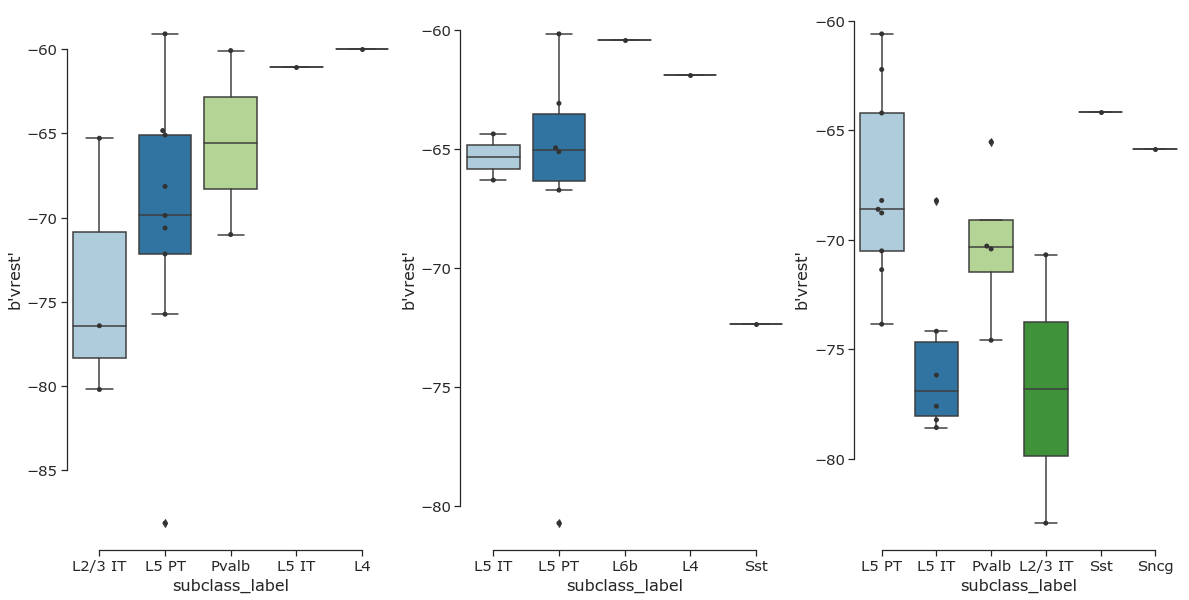

In [20]:
fig_dims = (20, 10)
f, axes = plt.subplots(1, 3, figsize=fig_dims)

sns.boxplot(x="subclass_label",
              y="b'vrest'",
              data=rspd, palette="Paired", ax=axes[0])
sns.swarmplot(x="subclass_label",
              y="b'vrest'",
              data=rspd, color="0.2", ax=axes[0])

sns.boxplot(x="subclass_label",
              y="b'vrest'",
              data=rspv, palette="Paired", ax=axes[1])
sns.swarmplot(x="subclass_label",
              y="b'vrest'",
              data=rspv, color="0.2", ax=axes[1])

sns.boxplot(x="subclass_label",
              y="b'vrest'",
              data=ssp, palette="Paired", ax=axes[2])
sns.swarmplot(x="subclass_label",
              y="b'vrest'",
              data=ssp, color="0.2", ax=axes[2])
sns.despine(trim=True, left=False)

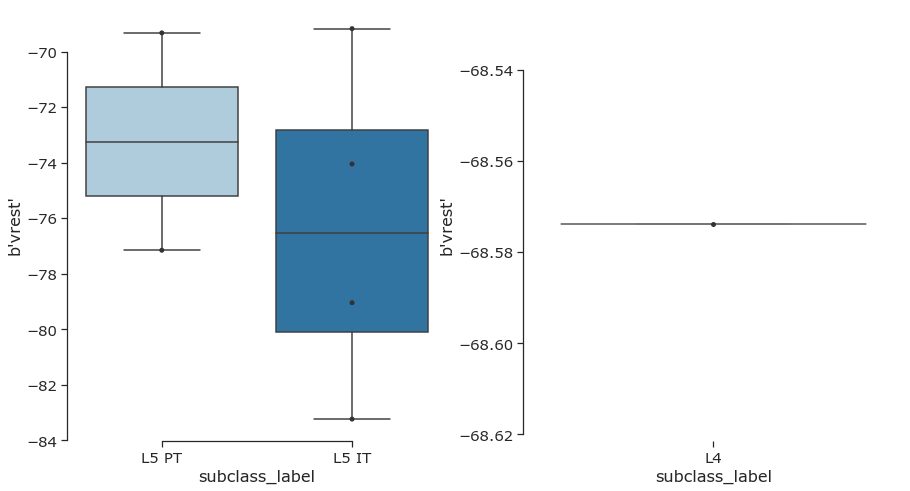

In [21]:
fig_dims = (15, 8)
f, axes = plt.subplots(1, 2, figsize=fig_dims)

sns.boxplot(x="subclass_label",
              y="b'vrest'",
              data=orb, palette="Paired", ax=axes[0])
sns.swarmplot(x="subclass_label",
              y="b'vrest'",
              data=orb, color="0.2", ax=axes[0])

sns.boxplot(x="subclass_label",
              y="b'vrest'",
              data=ctxsp, palette="Paired", ax=axes[1])
sns.swarmplot(x="subclass_label",
              y="b'vrest'",
              data=ctxsp, color="0.2", ax=axes[1])
sns.despine(trim=True, left=False)

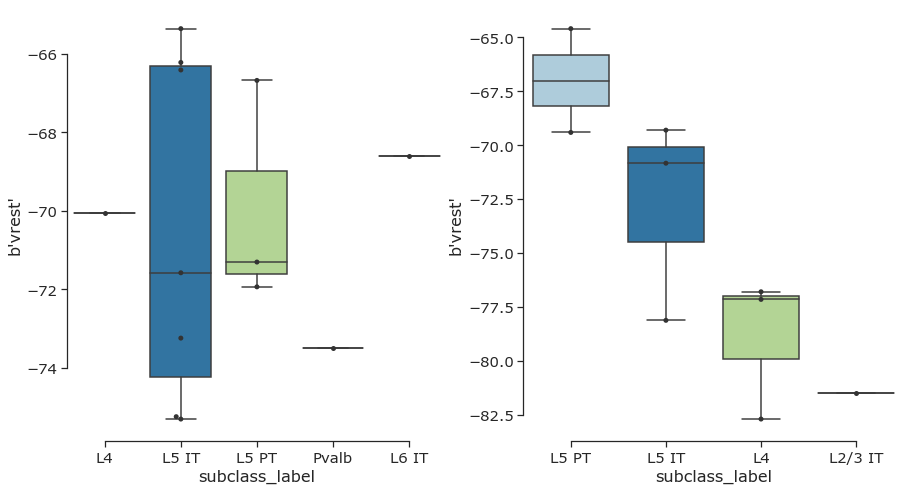

In [22]:
fig_dims = (15, 8)
f, axes = plt.subplots(1, 2, figsize=fig_dims)

sns.boxplot(x="subclass_label",
              y="b'vrest'",
              data=mos, palette="Paired", ax=axes[0])
sns.swarmplot(x="subclass_label",
              y="b'vrest'",
              data=mos, color="0.2", ax=axes[0])

sns.boxplot(x="subclass_label",
              y="b'vrest'",
              data=mop, palette="Paired", ax=axes[1])
sns.swarmplot(x="subclass_label",
              y="b'vrest'",
              data=mop, color="0.2", ax=axes[1])
sns.despine(trim=True, left=False)

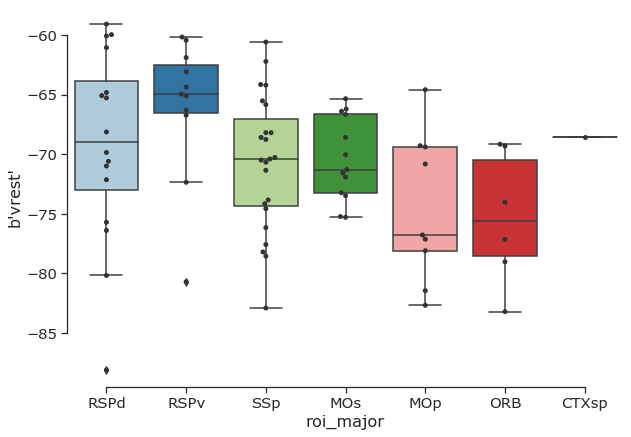

In [23]:
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot(x="roi_major",
              y="b'vrest'",
              data=all_df, color="0.2")
sns.boxplot(x="roi_major",
              y="b'vrest'",
              data=all_df, palette="Paired")
sns.despine(trim=True, left=False)

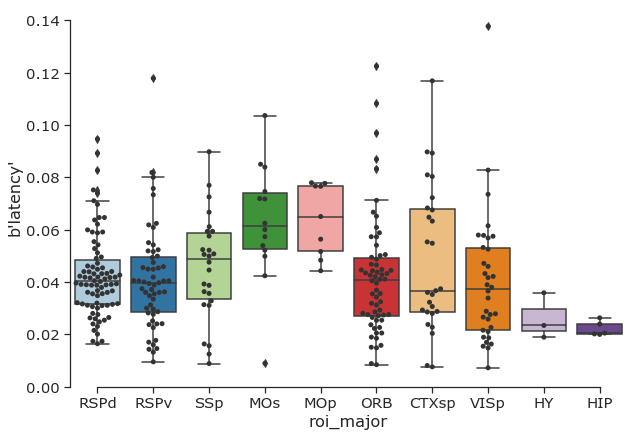

In [24]:
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot(x="roi_major",
              y="b'latency'",
              data=m_df[m_df["b'latency'"] < 0.2], color="0.2")
sns.boxplot(x="roi_major",
              y="b'latency'",
              data=m_df[m_df["b'latency'"] < 0.2], palette="Paired")
sns.despine(trim=True, left=False)

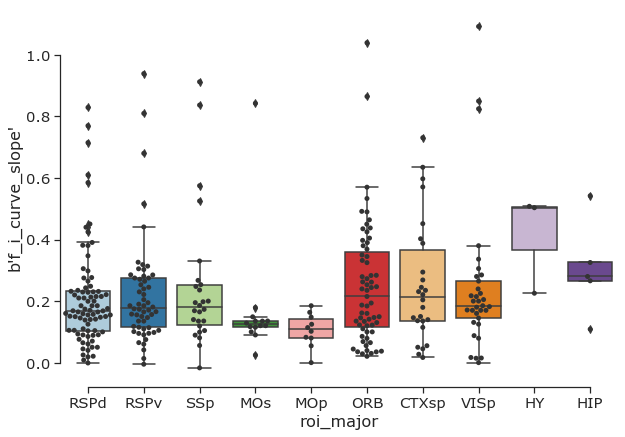

In [25]:
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot(x="roi_major",
              y="b'f_i_curve_slope'",
              data=m_df[m_df["b'f_i_curve_slope'"] < 1.1], color="0.2")
sns.boxplot(x="roi_major",
              y="b'f_i_curve_slope'",
              data=m_df[m_df["b'f_i_curve_slope'"] < 1.1], palette="Paired")
sns.despine(trim=True, left=False)

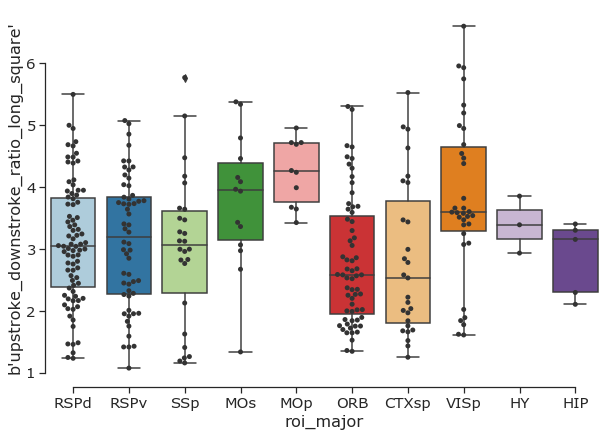

In [26]:
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot(x="roi_major",
              y="b'upstroke_downstroke_ratio_long_square'",
              data=m_df, color="0.2")
sns.boxplot(x="roi_major",
              y="b'upstroke_downstroke_ratio_long_square'",
              data=m_df, palette="Paired")
sns.despine(trim=True, left=False)

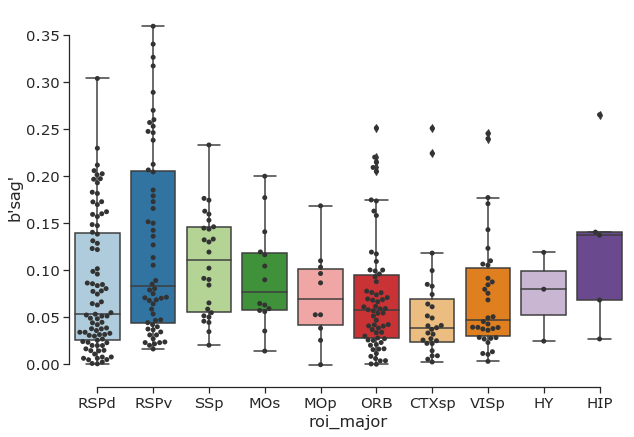

In [27]:
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot(x="roi_major",
              y="b'sag'",
              data=m_df, color="0.2")
sns.boxplot(x="roi_major",
              y="b'sag'",
              data=m_df, palette="Paired")
sns.despine(trim=True, left=False)

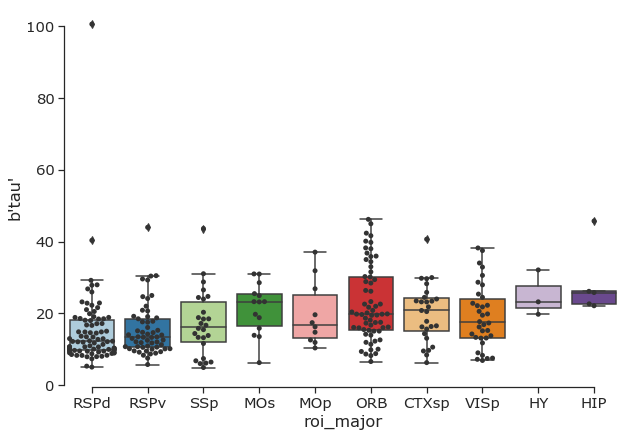

In [28]:
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot(x="roi_major",
              y="b'tau'",
              data=m_df, color="0.2")
sns.boxplot(x="roi_major",
              y="b'tau'",
              data=m_df, palette="Paired")
sns.despine(trim=True, left=False)

##### File Paths

In [29]:
csv_path = "C:/Users/ramr/Documents/Github/analysis_projects/csv/"
excel_path = "C:/Users/ramr/Documents/Github/analysis_projects/excel/"

##### Writing to csv_file

In [30]:
jem.to_csv(csv_path + "jem.csv")
jem_2020.to_csv(csv_path + "jem_2020.csv")

##### Writing to excel_file

In [31]:
writer = pd.ExcelWriter(excel_path + "new_region.xlsx")
jem.to_excel(writer, "jem_metadata", freeze_panes=(1,0))
jem_2020.to_excel(writer, "jem_2020", freeze_panes=(1,0))
cor.to_excel(writer, "coronal_region", freeze_panes=(1,0))
sag.to_excel(writer, "sagittal_region", freeze_panes=(1,0))
other.to_excel(writer, "other_region", freeze_panes=(1,0))
v1.to_excel(writer, "v1_region", freeze_panes=(1,0))
writer.save()